# **Kết nối với DATASETS - KAGGLE**
Dataset sử dụng là tập Dataset HAM10000.

In [ ]:
!pip install kaggle
!mkdir kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Sử dụng API của Kaggle để tải Dataset**

In [ ]:
import os
import json 
kaggleAPIToken = {"username":"nguyentrongdai","key":"4aa77d176a70438505e128fb9dbbb279"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(kaggleAPIToken, file)

**Tải Dataset từ Kaggle về máy chủ ở Google Colab**

In [ ]:
!chmod 600 /content/kaggle/kaggle.json
!sudo mkdir ~/.kaggle
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d nguyentrongdai/skin-cancer

100% 2.57G/2.58G [00:20<00:00, 147MB/s]
100% 2.58G/2.58G [00:20<00:00, 133MB/s]


**Giải nén Dataset**

In [ ]:
!unzip /content/skin-cancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029322.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029323.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029324.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029325.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029326.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029327.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029328.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029329.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029330.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029331.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029332.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029333.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029334.jpg  
  inflating: SkinCancer/HAM10000_images_part_2/ISIC_0029335.jpg  
  inflating: SkinCancer/H

# **Import thư viện**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
from glob import glob

from PIL import Image

from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(os.listdir("SkinCancer"))

['HAM10000_images_part_1', 'HAM10000_metadata.csv', 'HAM10000_images_part_2']


In [ ]:
# Thư mục chứa Dataset
dataPath = os.path.join('/content/SkinCancer')
dataPart1Path = os.path.join(dataPath, 'HAM10000_images_part_1')
dataPart2Path = os.path.join(dataPath, 'HAM10000_images_part_2')
metadataPath = os.path.join(dataPath, 'HAM10000_metadata.csv')

In [ ]:
indexOfImages = {}
for x in glob(os.path.join(dataPart1Path, '*.jpg')):
    indexOfImages[os.path.splitext(os.path.basename(x))[0]] = x
for x in glob(os.path.join(dataPart2Path, '*.jpg')):
    indexOfImages[os.path.splitext(os.path.basename(x))[0]] = x

print("Độ dài của mảng IndexOfImage: ", len(indexOfImages))

Độ dài của mảng IndexOfImage:  10015


In [ ]:
labelLoaiBenh = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [ ]:
skinCancerDataframe = pd.read_csv(metadataPath)
skinCancerDataframe.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
skinCancerDataframe['duong_dan_image'] = skinCancerDataframe['image_id'].map(indexOfImages.get)
skinCancerDataframe['loai_benh'] = skinCancerDataframe['dx'].map(labelLoaiBenh.get)
skinCancerDataframe['index_loai_benh'] = pd.Categorical(skinCancerDataframe['loai_benh']).codes

In [ ]:
skinCancerDataframe.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,duong_dan_image,loai_benh,index_loai_benh
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/SkinCancer/HAM10000_images_part_1/ISI...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/SkinCancer/HAM10000_images_part_1/ISI...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/SkinCancer/HAM10000_images_part_1/ISI...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/SkinCancer/HAM10000_images_part_1/ISI...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/SkinCancer/HAM10000_images_part_2/ISI...,Benign keratosis-like lesions,2
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,/content/SkinCancer/HAM10000_images_part_1/ISI...,Benign keratosis-like lesions,2
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,/content/SkinCancer/HAM10000_images_part_1/ISI...,Benign keratosis-like lesions,2
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,/content/SkinCancer/HAM10000_images_part_1/ISI...,Benign keratosis-like lesions,2
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,/content/SkinCancer/HAM10000_images_part_1/ISI...,Benign keratosis-like lesions,2
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,/content/SkinCancer/HAM10000_images_part_1/ISI...,Benign keratosis-like lesions,2


In [ ]:
# Thông tin về dữ liệu
skinCancerDataframe.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,duong_dan_image,loai_benh
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,10015,7
top,HAM_0003789,ISIC_0027419,nv,histo,male,back,/content/SkinCancer/HAM10000_images_part_1/ISI...,Melanocytic nevi
freq,6,1,6705,5340,5406,2192,1,6705


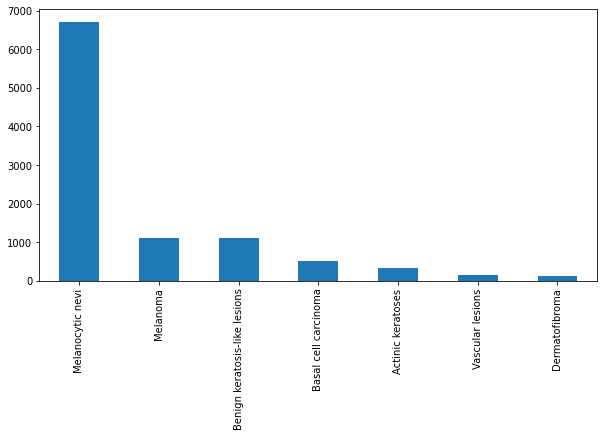

In [ ]:
# Vẽ biểu đồ phân bố của các loại bệnh về da trong Dataset
figure, axis = plt.subplots(1, 1, figsize= (10, 5))
skinCancerDataframe['loai_benh'].value_counts().plot(kind='bar', ax=axis)
figure.savefig('category_samples.png', dpi=300)

Có sự mất cân bằng rất lớn ở class bệnh Melanocytic nevi (nv).

## **Show một vài dữ liệu mẫu trong tập dữ liệu**

In [ ]:
skinCancerDataframe['image'] = skinCancerDataframe['duong_dan_image'].map(lambda x: np.asarray(Image.open(x).resize((100, 100))))

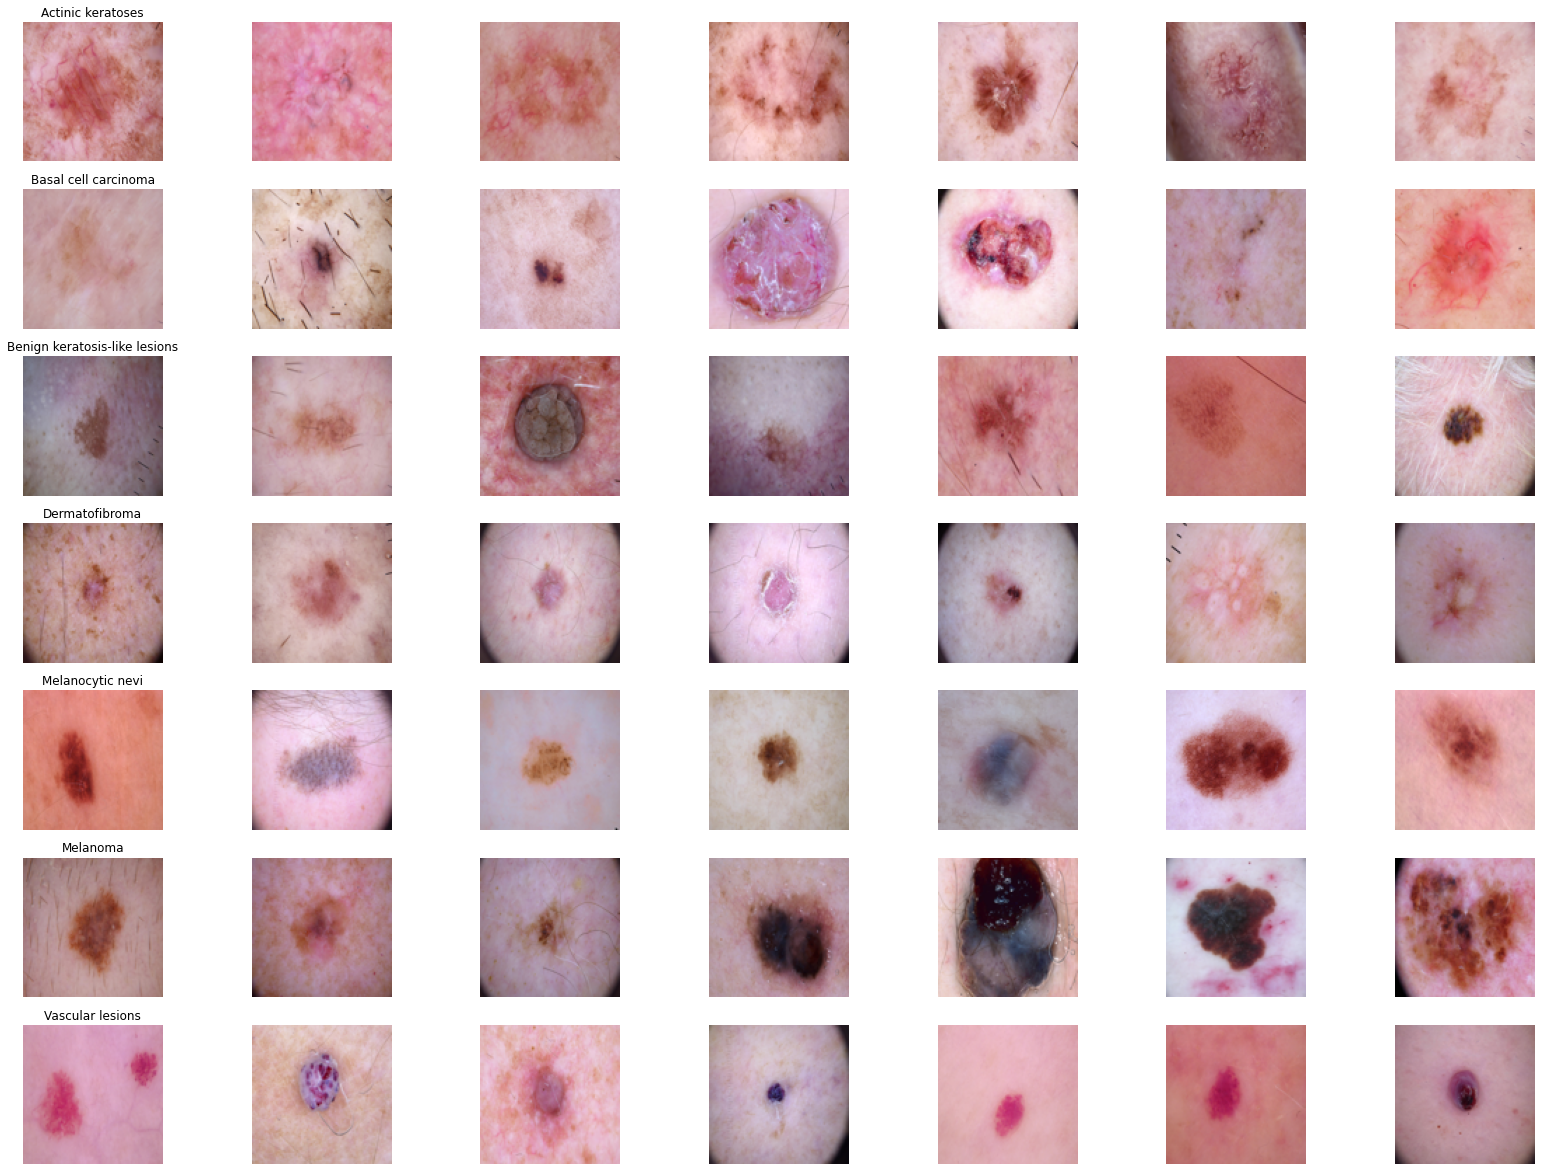

In [ ]:
so_luong_cot = 7
fig, m_axs = plt.subplots(7, so_luong_cot, figsize = (4*so_luong_cot, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, skinCancerDataframe.sort_values(['loai_benh']).groupby('loai_benh')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(so_luong_cot, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

## **Từ tập dữ liệu tách ra làm Features và Labels**

In [ ]:
features=skinCancerDataframe.drop(columns=['index_loai_benh'],axis=1)
target=skinCancerDataframe['index_loai_benh']

In [ ]:
len(features)

10015

### **Chia tập dữ liệu thành tập Train và tập Test theo tỉ lệ 8 train và 2 test**

In [ ]:
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(features, target, test_size=0.20)

### **Rescale dữ liệu ở các feature và One Hot Encoder nhãn.**

In [ ]:
x_train = np.asarray(x_train_raw['image'].tolist())
x_test = np.asarray(x_test_raw['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

y_train = to_categorical(y_train_raw, num_classes = 7)
y_test = to_categorical(y_test_raw, num_classes = 7)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.15)

x_train = x_train.reshape(x_train.shape[0], *(100, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 100, 3))

## Augument data
Nhầm mục đích làm giàu dữ liệu, và giảm hiện tượng bị mất cân bằng dữ liệu.

In [ ]:
train_rows=len(x_train)
train_rows

6810

In [ ]:
dataGenerator = ImageDataGenerator(
        rotation_range=40,
        zoom_range = 0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode = "nearest")
valGenerator = ImageDataGenerator()

dataGenerator.fit(x_train)
valGenerator.fit(x_validate)

# **Tạo Model CNN**

In [ ]:
from tensorflow.keras.layers import AveragePooling2D,GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
input_shape = (100, 100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", padding = "Same", input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", padding = "Same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation = "relu", padding = "Same"))
model.add(Conv2D(64, kernel_size=(3,3), activation = "relu", padding = "Same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                        

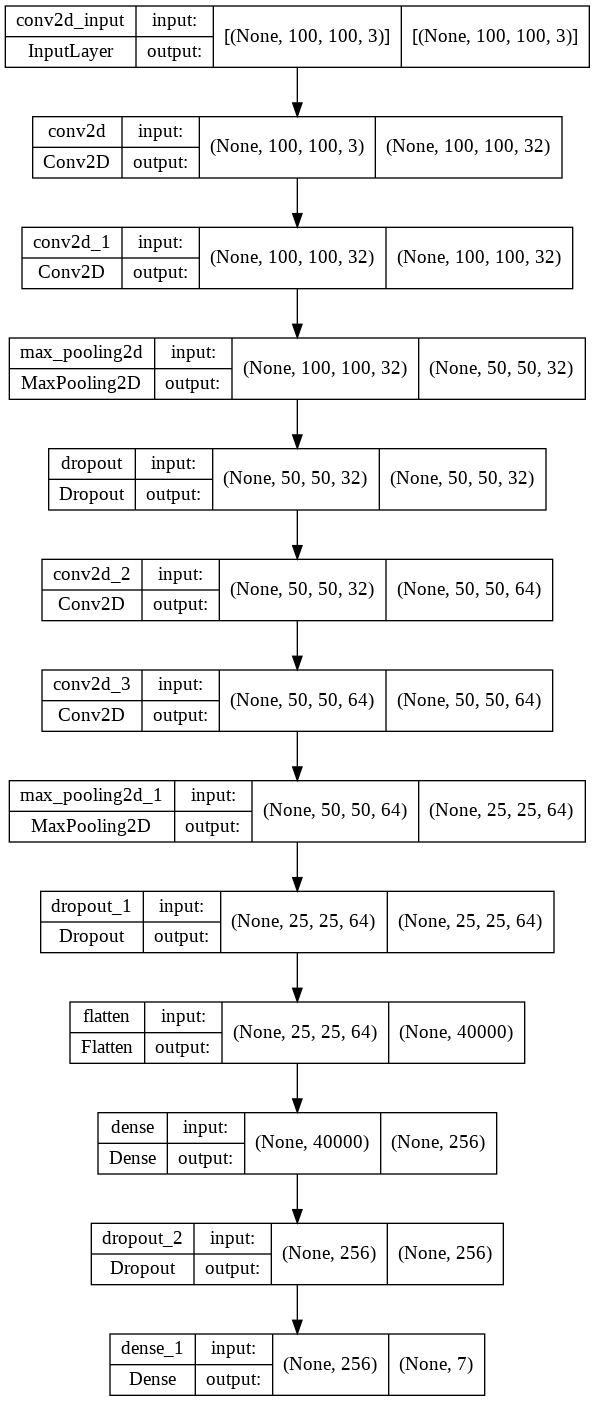

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5,
                                            mode='auto',
                                            min_delta=0.0001, 
                                            min_lr=0.00001)

In [ ]:
class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 2.5, # nv
    5: 1.0, # mel
    6: 1.0, # vasc
}

In [ ]:
epochs = 30
batch_size = 10
history = model.fit(dataGenerator.flow(x_train,y_train, batch_size=batch_size),
                    epochs = epochs,
                    class_weight =  class_weights,
                    validation_data = valGenerator.flow(x_validate,y_validate, batch_size=batch_size),
                    steps_per_epoch=(x_train.shape[0] // batch_size), 
                    callbacks=[learning_rate_reduction])

Epoch 1/30
681/681 [==============================] - 29s 28ms/step - loss: 1.3190 - accuracy: 0.6626 - val_loss: 0.9364 - val_accuracy: 0.6664 - lr: 1.0000e-04
Epoch 2/30
681/681 [==============================] - 20s 29ms/step - loss: 1.1700 - accuracy: 0.6631 - val_loss: 0.9153 - val_accuracy: 0.6664 - lr: 1.0000e-04
Epoch 3/30
681/681 [==============================] - 19s 28ms/step - loss: 1.1118 - accuracy: 0.6634 - val_loss: 0.8584 - val_accuracy: 0.6747 - lr: 1.0000e-04
Epoch 4/30
681/681 [==============================] - 20s 29ms/step - loss: 1.0613 - accuracy: 0.6687 - val_loss: 0.8084 - val_accuracy: 0.6889 - lr: 1.0000e-04
Epoch 5/30
681/681 [==============================] - 19s 28ms/step - loss: 1.0384 - accuracy: 0.6758 - val_loss: 0.7813 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 6/30
681/681 [==============================] - 19s 29ms/step - loss: 1.0075 - accuracy: 0.6802 - val_loss: 0.7747 - val_accuracy: 0.7047 - lr: 1.0000e-04
Epoch 7/30
681/681 [==============

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=0)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.773710  ;  loss_v = 0.637405
Test: accuracy = 0.785322  ;  loss = 0.609353


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f1e20969a90>:
              precision    recall  f1-score   support

     class 0       0.50      0.41      0.45        41
     class 1       0.52      0.58      0.55        57
     class 2       0.59      0.42      0.49       113
     class 3       0.00      0.00      0.00        13
     class 4       0.82      0.96      0.88       801
     class 5       0.71      0.33      0.45       154
     class 6       1.00      0.52      0.69        23

    accuracy                           0.77      1202
   macro avg       0.59      0.46      0.50      1202
weighted avg       0.75      0.77      0.75      1202




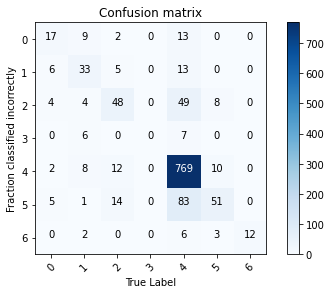

In [ ]:
from sklearn import metrics

Y_pred = model.predict(x_validate)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(y_validate,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(7)) 
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 
                'class 5', 'class 6']
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))

In [ ]:
model.save('/content/drive/MyDrive/ngtrdai/SkinCancer/SkinCancer.h5')

Text(0.5, 1.0, 'Training and validation loss')

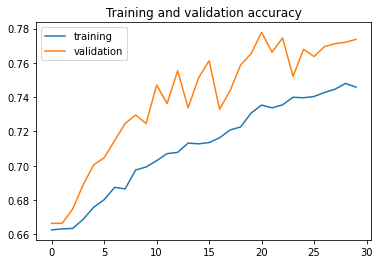

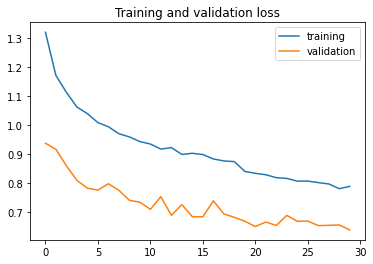

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

In [ ]:
modelH5 = tf.keras.models.load_model("/content/drive/MyDrive/ngtrdai/SkinCancer/SkinCancer.h5")